In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Nissan LEAF Battery Survey Data
##### Plug In America's LEAF Owner Survey
##### Nissan LEAF vehicle reports from Plug In America website
It's one of the most frequently asked questions by anyone thinking about a Battery Electric Vehicle (BEV): 
do I have to replace the battery?
With many years of experience in mobile phones and with laptop computers, most buyers know that lithium-ion batteries lose capacity over time, with a 1- to 4-year expected life.
Replacing phone or laptop batteries, generally for less than $100, is irritating but not a deal-breaker.
However, the possibility of replacing an electric-car battery pack costing several thousand dollars, may well be.

Owners, and potential owners, are understandably curious to know what is the typical experience like and what does battery degradation mean for them. 

Battery Capacity : 1 kWh can supply power for one hour at a rate of 1,000 watts. Most BEV in the world have 24kWh batteries

The Nissan LEAF was the 1st mass produced BEV, fully-electric vehicle made by a major automaker. It was released in late 2010.

In [2]:
surveys = pd.read_csv('../data/leaf.txt', sep='\t', lineterminator='\n')
surveys

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,...,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments
0,1264,622,09/18/2019 21:27,2015,LEAF SV,United States,2/2015,2/2018,t,WA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1269,623,11/30/2019 06:17,2018,LEAF SV,United States,3/2018,5/2018,t,VT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1274,624,03/03/2020 12:21,2018,LEAF S,United States,8/2018,9/2018,t,MA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1275,625,03/03/2020 13:17,2014,LEAF SV,United States,1/2014,3/2014,f,NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325,626,08/18/2021 19:59,2012,LEAF SV,United States,4/2012,9/2019,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,1273,612,02/26/2020 18:27,2018,LEAF SL,United States,8/2018,9/2018,t,DE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,1321,651,02/28/2021 16:45,2014,LEAF SL Plus,Norway,3/2014,1/2021,t,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,1322,551,06/18/2021 15:04,2011,LEAF SL,United States,10/2010,10/2014,t,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,1327,652,12/25/2021 08:57,2019,LEAF S,United States,3/2019,7/2019,t,HI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure what a Nissan Battery Report is.


In [3]:
surveys.keys()

Index(['report_id', 'vehicle_id', 'date_submit', 'model_year', 'model',
       'country', 'date_built', 'date_acquired', 'qc_port', 'state', 'city',
       'postal_code', 'odometer', 'unit_distance', 'capacity_bars',
       'perceived_range', 'perceived_range_text', 'soc_meter', 'gids_80',
       'gids_100', 'ah_pack', 'soh', 'hx', 'bar_11_date', 'bar_11_odometer',
       'bar_10_date', 'bar_10_odometer', 'bar_9_date', 'bar_9_odometer',
       'bar_8_date', 'bar_8_odometer', 'bar_7_date', 'bar_7_odometer',
       'batt_swapped', 'batt_swap_count', 'batt_swap_warranty',
       'dist_batt_swap', 'date_batt_swap', 'bars_batt_swap', 'gids_batt_swap',
       'ah_batt_swap', 'soh_batt_swap', 'charge_method', 'charge_method_text',
       'range_charge_frequency', 'range_charge_frequency_text',
       'standard_charge_frequency', 'standard_charge_frequency_text',
       'topoff_charge_frequency', 'parked_charge_frequency', 'qc_count',
       'drive_frequency', 'trip_distance', 'elevation_gain'

In [4]:
surveys.dtypes.head(50)

report_id                           int64
vehicle_id                          int64
date_submit                        object
model_year                          int64
model                              object
country                            object
date_built                         object
date_acquired                      object
qc_port                            object
state                              object
city                               object
postal_code                        object
odometer                            int64
unit_distance                      object
capacity_bars                       int64
perceived_range                     int64
perceived_range_text               object
soc_meter                          object
gids_80                           float64
gids_100                          float64
ah_pack                           float64
soh                               float64
hx                                float64
bar_11_date                       

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 650)

### Exploratory Analysis
#### Looking at bars and mileage to determine battery degradation
#### 12 Capacity bars is full/ initial capacity

In [6]:
surveys.vehicle_id.nunique()

647

In [147]:
surveys.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,73.000000,159.000000,168.00000,156.000000,150.000000,165.000000,70.000000,38.000000,23.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,455.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,370.000000,368.000000,337.000000,337.000000,341.000000,331.000000,25.0,17.000000,16.0,105.000000,103.000000,94.000000,169.000000,172.000000,155.000000,104.000000,107.000000,98.000000,85.000000,89.000000,83.000000,35.000000,34.000000,33.000000,25.000000,25.000000,24.000000,12.000000,13.000000,10.000000,153.000000,160.000000,67.000000,36.000000,23.000000,5.000000
mean,716.556414,327.962906,2012.098918,26867.299845,11.341577,3.228748,204.945205,246.654088,57.16688,83.815385,74.823333,28466.612121,35230.028571,47332.078947,62073.086957,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.965997,4.853168,5.111283,7.680062,7.630603,21.253478,2.369397,36.517774,361.492308,42.255023,63.729521,31.145286,0.894900,0.202473,1.480680,0.924266,6.391892,2013.532609,4.842730,4.738872,4.868035,4.812689,0.0,0.294118,0.0,5469.144762,4.699029,1038.048936,9318.221893,4.866279,1845.083226,10072.911538,4.902336,2171.919490,6968.794235,24.014831,1349.662651,9897.221429,57.263235,1875.224242,7684.992400,4.748000,1408.046667,6126.264167,4.392308,1619.397000,683.705882,858.175000,1129.522388,1393.027778,1802.695652,1849.200000
std,393.697232,188.575986,1.625869,23575.240850,1.158834,1.235533,41.062923,69.751456,17.54054,11.513802,18.587493,19430.496927,25365.703337,24124.017351,31739.039620,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.587870,2.654236,2.693872,2.247383,2.286965,55.172267,0.654484,23.993083,469.555038,29.493425,12.567075,93.913061,3.568189,0.787358,1.302242,0.689695,3.248588,1.813970,0.665172,0.753999,0.644117,0.806013,0.0,1.212678,0.0,8896.448061,1.841435,1481.228646,27240.108097,1.563854,4120.344771,18124.400386,1.734940,3069.498723,6230.295197,176.544350,1059.373992,9685.917230,306.170853,1530.552120,8083.687898,0.968728,1258.754401,4520.223648,1.041202,924.565626,483.512231,495.881003,609.837568,752.704438,668.526088,1158.863538
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.20000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000,10.000000,-605.000000,37.000000,40.000000,840.000000,177.000000
25%,354.000000,164.500000,2011.000000,10958.500000,11.000000,2.000000,189.000

Understanding the model year ranges

In [8]:
LEAF_year = surveys['model_year'].value_counts().reset_index()
LEAF_year.columns = ['Model Year', 'Customer Reports']
LEAF_year['Percentage'] = 100 * LEAF_year['Customer Reports']  / LEAF_year['Customer Reports'].sum()
LEAF_year

,Model Year,Customer Reports,Percentage
0,2011,324,50.077280
1,2012,158,24.420402
2,2013,80,12.364760
3,2015,29,4.482226
4,2014,21,3.245750
5,2016,17,2.627512
6,2018,9,1.391036
7,2019,6,0.927357
8,2017,3,0.463679


In [9]:
LEAF_year.to_csv('../data/leaf_year.csv', index = False)

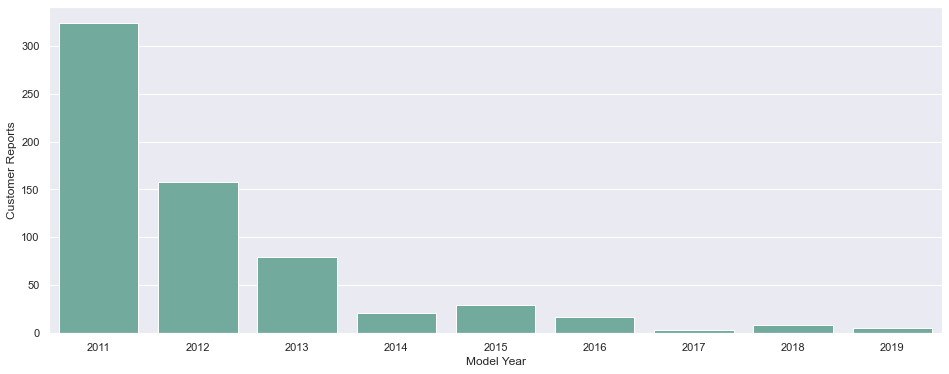

In [10]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
sns.barplot(x='Model Year',
            y='Customer Reports',
            data=LEAF_year, 
            estimator=sum, 
            ci=None, 
            color='#69b3a2'
            );

#### Half of all survey participants reported on their 2011 LEAFs built from late 2010, and a quarter on 2012 model year,  so almost 75% of 11-10 year old vehicles. That's a great sample of older models to analyze battery degradation

In [11]:
surveys.groupby(['state', 'capacity_bars'])['bar_11_odometer'].mean()

state  capacity_bars
AL     11               22797.000000
       12                        NaN
AR     12                        NaN
AZ     7                         NaN
       8                  663.000000
       9                 9651.500000
       10                9723.200000
       11               21304.000000
       12                        NaN
BC     8                19133.000000
       11               75946.000000
       12                        NaN
CA     7                24250.000000
       8                35758.400000
       9                25051.000000
       10               36356.866667
       11               26337.473684
       12               18602.000000
CO     11               21000.000000
       12                        NaN
CT     10                        NaN
       12                        NaN
DE     12                        NaN
FL     6                         NaN
       10               16571.500000
       11               17106.000000
       12        

In [12]:
surveys.state.value_counts()

CA    222
WA     82
AZ     29
FL     25
TX     24
OR     24
HI     16
GA     15
VA     14
NC     13
TN     13
CO     11
MN     10
NY      9
IL      9
WI      8
NV      7
ON      7
MA      7
BC      7
IN      6
PA      5
MD      5
UT      5
MO      5
CT      4
OH      4
SC      4
ME      3
VT      3
AL      3
QC      2
KS      2
MI      2
IA      2
ID      2
MB      2
NH      1
NB      1
NJ      1
NM      1
AR      1
WY      1
NE      1
LA      1
DE      1
Name: state, dtype: int64

#### How does range change over the first few years of car ownership?
#### The lowest capacity bar mileage reported is bar 7. That means a 45% reduction of initial range

In [13]:
surveys.loc[surveys['state'] == 'CA'].bar_7_odometer.mean()

80480.0

In [14]:
LEAF_by_country = surveys['country'].value_counts().reset_index()
LEAF_by_country.columns = ['Country', 'Customer Reports']
LEAF_by_country['Percentage'] = 100 * LEAF_by_country['Customer Reports']  / LEAF_by_country['Customer Reports'].sum()
LEAF_by_country

,Country,Customer Reports,Percentage
0,United States,601,92.890263
1,Canada,19,2.936631
2,Norway,10,1.545595
3,Denmark,3,0.463679
4,Spain,3,0.463679
5,United Kingdom,2,0.309119
6,Sweden,2,0.309119
7,Germany,2,0.309119
8,Estonia,2,0.309119
9,Portugal,1,0.154560


In [15]:
surveys.unit_distance.value_counts()

mi    600
km     47
Name: unit_distance, dtype: int64

In [16]:
surveys[surveys['unit_distance'] == 'km'].odometer.describe()

count        47.000000
mean      56859.191489
std       37333.440795
min        4412.000000
25%       26107.000000
50%       50221.000000
75%       78931.000000
max      154617.000000
Name: odometer, dtype: float64

In [17]:
surveys_usa = surveys[surveys['unit_distance'] == 'mi']

In [18]:
surveys_usa.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,62.000000,142.000000,141.000000,129.000000,124.000000,157.000000,66.000000,36.000000,21.000000,7.000000,18.000000,17.000000,8.000000,8.000000,8.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,414.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,338.000000,336.000000,308.000000,309.000000,313.000000,304.00000,24.0,16.0000,15.0,100.000000,98.000000,89.000000,161.000000,164.000000,147.000000,94.000000,98.000000,89.000000,72.000000,77.000000,70.000000,24.00000,24.000000,22.000000,21.000000,21.000000,20.000000,11.000000,12.000000,9.000000
mean,698.426667,318.648333,2012.068333,24517.935000,11.326667,3.241667,202.806452,246.225352,56.681673,83.181008,73.884113,27116.636943,33330.287879,44902.388889,57778.238095,80771.285714,1.055556,8.176471,192.500000,43.177512,62.500000,1.973333,4.895000,5.111667,7.631667,7.625000,18.583333,2.378333,34.116667,383.101449,42.190000,61.325000,28.255000,0.778333,0.178333,1.505000,0.891667,6.343195,2013.446429,4.853896,4.744337,4.869010,4.81250,0.0,0.3125,0.0,4793.677000,4.526531,935.937079,7123.605590,4.651829,1530.522449,8090.047872,4.644898,1908.047303,5332.016667,4.593506,1155.250000,6467.30000,4.429167,1440.940909,6483.740952,4.442857,1280.241000,5409.015455,4.141667,1588.241111
std,394.466481,189.210683,1.624211,20402.405268,1.168574,1.244660,36.574128,72.533621,18.283419,11.560813,18.106094,18538.356123,24405.901664,20328.212413,25707.493715,35098.742830,0.235702,0.727607,43.749286,3.953142,10.042766,0.602684,2.646188,2.659760,2.242256,2.238167,52.629010,0.650052,19.698471,481.564741,29.407003,8.873779,91.408511,3.245523,0.688467,1.341507,0.673810,3.191322,1.799698,0.651796,0.749031,0.634554,0.80901,0.0,1.2500,0.0,3930.434887,1.482026,795.256022,4510.588628,0.970578,1111.989708,5181.406507,0.910661,1676.216830,4034.187257,0.964957,824.828654,4706.37913,1.235869,1023.533777,6395.500970,0.506529,1093.091393,3960.426816,0.540132,975.066172
min,6.000000,1.000000,2011.000000,181.000000,3.000000,1.000000,105.000000,86.000000,15.200000,34.780000,26.370000,663.000000,663.000000,786.000000,26666.000000,43200.000000,1.000000,7.000000,149.000000,36.130000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.00000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,237.000000,3.700000,64.000000,830.000000,3.200000,386.100000
25%,328.500000,152.750000,2011.000000,10493.750000,11.000000,2.000000,189.250000,218.250000,50.560000,77.000000,61.057500,15200.000000,21514.750000,36750.000000,42000.000000,56500.000000,1.000000,8.000000,176.250000,42.730000,61.750000,2.000000,3.000000,3.000000,6.000000,6.000000,0.000000,2.000000,20.000000,50.000000,13.750000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2012.000000,5.000000,5.000000,5.000000

In [19]:
surveys_usa[surveys_usa['capacity_bars'] == 12].odometer.mean() # Full capacity bars

17134.136597938144

In [20]:
surveys_usa['capacity_bars'].value_counts()

12    388
11    109
10     52
9      25
8      20
7       3
6       2
3       1
Name: capacity_bars, dtype: int64

In [21]:
bar_12_full = surveys_usa[surveys_usa['capacity_bars'] == 12] 
bar_12_full.odometer.describe()

count      388.000000
mean     17134.136598
std      13867.182520
min        181.000000
25%       7800.000000
50%      13971.000000
75%      22388.500000
max      90500.000000
Name: odometer, dtype: float64

In [22]:
bar_12_full.to_csv('../data/leaf_bar_12.csv', index = False)

In [23]:
bar_12_nosw = bar_12_full[bar_12_full['batt_swapped'] == 'f']
bar_12_nosw.odometer.describe()

count      153.000000
mean     20934.503268
std      14249.217211
min        389.000000
25%      10786.000000
50%      19000.000000
75%      29600.000000
max      80023.000000
Name: odometer, dtype: float64

In [165]:
surveys.to_csv('../data/leaf_surveys.csv', index = False)

### Average Nissan LEAF mileage by battery capacity bars 
#### How fast will the battery lose capacity? From full 12 bars to 11 bars: capacity_bars bar_11_date bar_11_odometer

LEAF Owner's Manual: First generation Nissan Leaf battery charge, battery capacity and vehicle range meter
his gauge indicates the amount of charge the battery is capable of storing. With age and usage, the battery charge capacity decreases. This gauge also decreases over time and battery usage.

#### Capacity Bar 11 : How many miles to lose the 1st capacity bar from full capacity at 12?  Look at bar_11_odometer

In [24]:
surveys['bar_11_odometer'].describe()

count       165.000000
mean      28466.612121
std       19430.496927
min         663.000000
25%       16500.000000
50%       24800.000000
75%       35000.000000
max      160500.000000
Name: bar_11_odometer, dtype: float64

In [25]:
# Find outliers using Interquartile Range (IQR) = 16500 - 35000
low_outliers = 16500-(1.5 * 18500)
print(low_outliers)
high_outliers = 35000 + (1.5 * 18500)
print(high_outliers)

-11250.0
62750.0


7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


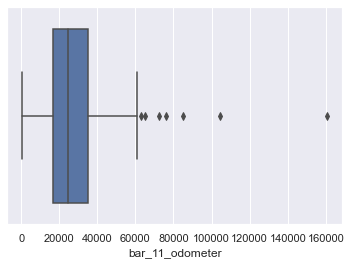

In [26]:
print(len(surveys.loc[(surveys.bar_11_odometer < -11250) | (surveys.bar_11_odometer > 62750)]))
sns.boxplot(surveys.bar_11_odometer);

In [27]:
len(surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)])

158

In [28]:
len(surveys.loc[(surveys.bar_11_odometer > -11250)])

165

In [148]:
bar_11 = surveys.loc[(surveys.bar_11_odometer > -11250) & (surveys.bar_11_odometer < 62750)]
bar_11['bar_11_odometer'].mean()

25764.58860759494

In [149]:
bar_11.describe()

,report_id,vehicle_id,model_year,odometer,capacity_bars,perceived_range,gids_80,gids_100,ah_pack,soh,hx,bar_11_odometer,bar_10_odometer,bar_9_odometer,bar_8_odometer,bar_7_odometer,batt_swap_count,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,range_charge_frequency,standard_charge_frequency,topoff_charge_frequency,parked_charge_frequency,qc_count,drive_frequency,trip_distance,elevation_gain,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,26.000000,52.000000,61.000000,56.000000,56.000000,158.000000,65.000000,32.000000,14.000000,4.00000,6.000000,6.000000,5.000000,5.000000,5.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,149.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,120.000000,120.000000,111.000000,110.000000,111.000000,110.000000,1.0,1.0,1.0,17.000000,16.000000,14.000000,32.000000,33.000000,29.000000,37.000000,37.000000,34.000000,29.000000,29.000000,27.000000,11.000000,10.000000,10.000000,11.000000,10.0000,10.000000,5.000000,5.000000,4.000000,1.0,151.000000,61.000000,31.000000,15.000000,3.000000
mean,920.677215,335.911392,2011.708861,38194.924051,10.303797,4.227848,181.192308,208.807692,50.171777,76.969821,62.331250,25764.588608,31893.446154,45039.281250,65359.142857,66549.75000,1.166667,8.333333,183.800000,44.686020,63.600000,1.974684,4.981013,5.189873,8.031646,8.069620,30.158228,2.481013,34.367089,381.872483,44.506329,62.829114,46.822785,1.088608,0.221519,1.449367,1.196203,6.375000,2013.900000,4.864865,4.754545,4.855856,4.763636,0.0,0.0,0.0,3662.741176,4.293750,715.992857,7078.159375,4.857576,1356.896552,9372.635135,4.835135,1944.029412,5284.972759,4.618966,1166.959259,8791.913636,5.240000,1729.260000,7220.568182,4.9900,1486.180000,5893.800000,4.860000,1349.225000,3389.0,810.013245,1120.622951,1505.032258,1984.133333,2569.666667
std,266.940850,183.451182,1.258367,21746.442869,1.245163,0.970250,25.873568,33.360208,7.861396,12.004600,15.486932,13271.673505,16514.224756,21239.718196,31408.753356,20563.86605,0.408248,0.816497,9.757049,3.467282,12.012493,0.552347,2.985040,2.778791,2.432322,2.503799,64.033582,0.729030,19.627861,493.504118,29.318968,10.232453,114.345020,3.931548,0.593204,1.309191,0.510512,3.130395,1.547022,0.610313,0.744230,0.685524,0.917988,NaN,NaN,NaN,2893.812414,1.922314,400.296266,5980.887431,0.812415,1000.580406,6971.556380,0.913241,1299.398148,3520.713411,0.793547,822.874932,8408.722207,1.278193,1303.093973,8087.892417,1.3287,1420.515926,5608.927545,1.441527,819.353177,NaN,423.631648,560.781038,746.070617,662.048754,624.128459
min,349.000000,1.000000,2011.000000,787.000000,3.000000,1.000000,105.000000,86.000000,19.350000,34.780000,26.370000,663.000000,663.000000,786.000000,36764.000000,43200.00000,1.000000,8.000000,174.000000,42.750000,44.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,990.400000,3.300000,271.300000,709.700000,3.300000,198.200000,791.000000,3.300000,159.400000,727.700000,3.500000,204.200000,632.000000,3.7000,169.200000,830.000000,4.000000,472.400000,3389.0,-605.000000,37.000000,40.000000,965.000000,1930.000000
25%,719.500000,188.000000,2011.000000,23019.750000,10.000000,4.000000,170.250000,188.750000,47.420000,69.982500,52.122500,15525.000000,2149

In [31]:
bar_11.median()

C:\Users\VDMA Coder\AppData\Local\Temp\ipykernel_20056\2893912067.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bar_11.median()


report_id                      908.000
vehicle_id                     341.000
model_year                    2011.000
odometer                     34970.000
capacity_bars                   11.000
perceived_range                  5.000
gids_80                        186.500
gids_100                       213.500
ah_pack                         51.500
soh                             80.000
hx                              62.985
bar_11_odometer              24302.500
bar_10_odometer              31716.000
bar_9_odometer               41419.000
bar_8_odometer               56191.500
bar_7_odometer               65347.000
batt_swap_count                  1.000
bars_batt_swap                   8.000
gids_batt_swap                 181.000
ah_batt_swap                    43.340
soh_batt_swap                   66.000
charge_method                    2.000
range_charge_frequency           4.000
standard_charge_frequency        4.000
topoff_charge_frequency          8.000
parked_charge_frequency  

In [150]:
bar_11.to_csv('../data/leaf_bar_11.csv', index = False)

#### Capacity Bar 10 : How many miles to capacity bar 10?  bar_10_odometer

In [33]:
surveys['bar_10_odometer'].mean()

35230.02857142857

In [34]:
# IQR = 21685 - 39483.75
low_outliers = 21685-(1.5 * 17798.75)
print(low_outliers)
high_outliers = 39483.75 + (1.5 * 17798.75)
print(high_outliers)

-5013.125
66181.875


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4


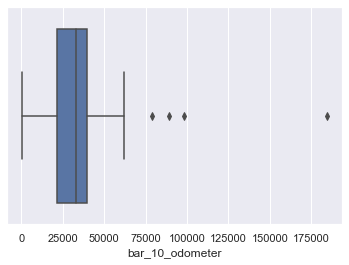

In [35]:
print(len(surveys.loc[(surveys.bar_10_odometer < -5013.125) | (surveys.bar_10_odometer > 66181.875)]))
sns.boxplot(surveys.bar_10_odometer);

In [36]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)])

66

In [37]:
len(surveys.loc[(surveys.bar_10_odometer > -5013.125)])

70

In [154]:
bar_10 = surveys.loc[(surveys.bar_10_odometer > -5013.125) & (surveys.bar_10_odometer < 66181.875)]
bar_10

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
9,1283,630,2020-03-03 15:57:00,2012,LEAF SL,United States,2011-10-01,2012-01-01,t,CA,Redondo Beach,90277,38522,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2016-06-01,14000.0,2016-06-01,22000.0,NaT,NaN,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),10,A few times per year,5,Weekly,8,8,...,3,15,0.0,ft,10,50,20,0,0,1,1,Own,NaN,6.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unable to access NissanConnect.,NaN,1613.0,1613.0,NaN,NaN,NaN
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,NaN,136.0,1487.0,2182.0,2259.0,NaN
33,515,377,2013-08-10 08:22:00,2013,NaN,United States,2013-06-01,2013-07-01,t,AZ,Phoenix,85015,787,mi,8,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2013-08-07,663.0,2013-08-07,663.0,2013-08-10,786.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),6,A few times per month,2,Daily,12,8,...,2,20,1200.0,ft,25,60,1,0,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709.7,3.6,198.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STK #: DC410870 | VIN #: 1N4AZ0CP1DC410870, LO...",NaN,37.0,37.0,40.0,NaN,NaN
132,507,75,2013-07-22 13:40:00,2011,NaN,United States,2011-03-01,2011-05-01,t,AZ,Tucson,85710,21397,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2012-09-21,13146.0,2013-07-16,21397.0,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,3,Most days of the week,8,8,...,3,40,200.0,ft,0,0,3,0,0,1,1,Own,NaN,5.0,2013.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509.0,807.0,NaN,NaN,NaN
316,516,378,2013-08-10 20:30:00,2011,NaN,United States,2011-06-01,2012-05-01,t,NV,Las Vegas,89131,17291,mi,10,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2013-01-01,15000.0,2013-05-01,16500.0,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Household outlet (110 to 120V),2,Daily,8,Never,3,8,...,2,3

In [152]:
bar_10.bar_10_odometer.mean()

30539.727272727272

In [155]:
bar_10.to_csv('../data/leaf_bar_10.csv', index = False)

#### Capacity Bar 9 : How fast will the battery lose capacity? bar_9_odometer

In [41]:
surveys['bar_9_odometer'].mean()

47332.07894736842

In [42]:
# IQR = 37250 - 54235.25
low_outliers = 37250-(1.5 * 16985.25)
print(low_outliers)
high_outliers = 54235.25 + (1.5 * 16985.25)
print(high_outliers)

11772.125
79713.125


4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


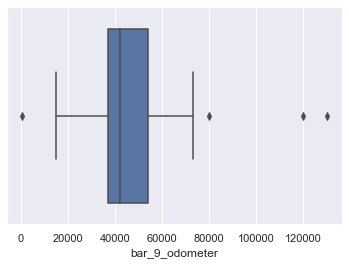

In [43]:
print(len(surveys.loc[(surveys.bar_9_odometer < 11772.125) | (surveys.bar_9_odometer > 79713.125)]))
sns.boxplot(surveys.bar_9_odometer);

In [156]:
bar_9 = surveys.loc[(surveys.bar_9_odometer > 11772.125) & (surveys.bar_9_odometer < 79713.125)]
bar_9.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.9500,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,NaN,136.0,1487.0,2182.0,2259.0,NaN
26,1309,648,2020-07-31 16:30:00,2012,LEAF SV,United States,2012-06-01,2019-02-01,t,VA,Hampton,23661,17277,mi,9,4,Noticeably less (5-10 miles) ...,t,NaN,173.0,38.8700,67.30,45.22,NaT,NaN,NaT,NaN,2020-02-01,15000.0,NaT,NaN,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),5,Weekly,10,A few times per year,9,9,...,3,15,25.0,ft,15,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN,NaN
99,508,21,2013-07-22 18:16:00,2011,NaN,United States,2011-02-01,2011-03-01,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,2013-05-21,41792.0,2013-06-29,43520.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,...,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib...",NaN,NaN,NaN,812.0,851.0,NaN
343,666,342,2014-05-19 20:10:00,2011,NaN,United States,2011-02-01,2011-06-01,t,CA,Irvine,NaN,48808,mi,9,5,Significantly less (over 10 miles) ...,t,NaN,195.0,NaN,NaN,NaN,2013-05-20,33080.0,2013-08-30,37406.0,2014-05-19,48778.0,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,6,A few times per month,6,10,...,2,60,700.0,ft,80,67,6,1,0,1,1,Own,NaN,5.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,821.0,1083.0,NaN,NaN
344,984,176,2015-06-20 14:11:00,2012,NaN,United States,2011-10-01,2012-11-01,t,TX,AUSTIN,78732,55500,mi,12,2,About the same ...,t,NaN,285.0,66.1414,101.00,NaN,NaT,22000.0,NaT,24000.0,2014-08-28,44357.0,NaT,NaN,NaT,NaN,t,1.0,t,"53,400",05/18/2015,8.0,180.0,43.0401,44.0,2,Level 2 Charging Station (208 to 240V),2,Daily,8,Never,10,11,...,2,45,300.0,ft,50,65,

In [45]:
bar_9.bar_9_odometer.mean()

43171.55882352941

In [157]:
bar_9.to_csv('../data/leaf_bar_9.csv', index = False)

#### Capacity Bar 8 : How fast will the battery lose capacity? bar_8_odometer

In [47]:
surveys.bar_8_odometer.mean()

62073.086956521736

In [48]:
# IQR = 42700 - 68668
low_outliers = 42700 - (1.5 * 25968)
print(low_outliers)
high_outliers = 68668 + (1.5 * 25968)
print(high_outliers)

3748.0
107620.0


2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


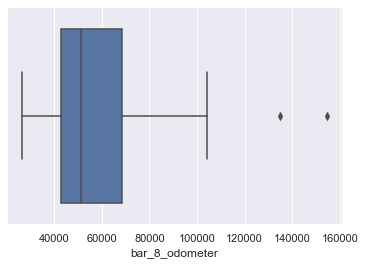

In [49]:
print(len(surveys.loc[(surveys.bar_8_odometer < 3748) | (surveys.bar_8_odometer > 107620)]))
sns.boxplot(surveys.bar_8_odometer);

In [158]:
bar_8 = surveys.loc[(surveys.bar_8_odometer > 3748) & (surveys.bar_8_odometer < 107620)]
bar_8.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
12,1286,633,2020-03-06 16:42:00,2011,LEAF SV,United States,2011-04-01,2011-05-01,t,WA,Bellevue,98006,50570,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,131.0,29.95,64.07,41.83,2011-09-14,14000.0,2015-05-27,23000.0,2017-04-21,36000.0,2017-07-07,40200.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,About equal mix of 120V and 240V,9,Monthly,6,A few times per month,10,10,...,4,18,500.0,ft,1,55,0,0,0,1,1,Own,NaN,5.0,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Range bar is indicating 12. RANGE is 35 miles!...,NaN,136.0,1487.0,2182.0,2259.0,NaN
99,508,21,2013-07-22 18:16:00,2011,NaN,United States,2011-02-01,2011-03-01,f,TX,Arlington,76016,44293,mi,8,5,Significantly less (over 10 miles) ...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,2013-05-21,41792.0,2013-06-29,43520.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),3,Most days of the week,8,Never,11,12,...,2,56,NaN,ft,80,57,200,2,0,2,1,Lease,NaN,7.0,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Lost my 4th bar at the end of June, now eligib...",NaN,NaN,NaN,812.0,851.0,NaN
348,855,64,2014-07-16 06:49:00,2011,NaN,United States,2011-05-01,2011-06-01,t,TX,Midlothian,76065,58950,mi,12,1,Range has increased ...,t,221.0,272.0,65.92,100.00,101.43,2012-06-17,20200.0,2012-08-16,23652.0,2013-09-11,44733.0,2014-01-21,58078.0,NaT,NaN,t,1.0,t,"58,145",02/02/2014,8.0,184.0,43.34,66.0,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,6,5,...,2,55,1149.0,ft,57,60,50,1,0,1,1,Own,NaN,7.0,2014.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,7745.0,5.1,1521.2,18700.5,4.9,3824.7,8591.8,4.7,1854.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This seemed to be the peak settling for my new...,NaN,382.0,442.0,833.0,965.0,NaN
365,1137,334,2017-02-27 20:46:00,2012,NaN,United States,2012-06-01,2012-11-01,t,TN,Tullahoma,37388,104101,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,175.0,NaN,NaN,NaN,2014-09-14,44800.0,2015-05-14,62000.0,2016-05-14,80000.0,2017-02-26,104074.0,NaT,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,8,Never,10,4,...,2,25,0.0,ft,10,64,600,2,2,1,1,Own,NaN,12.0,2013.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3168.0,4.0,790.7,25053.8,4.7,5385.4,12574.1,4.6,2724.4,18793.0,4.8,3914.0,19646.0,4.4,4428.0,NaN,NaN,NaN,With my 4th capacity bar gone & my range falli...,NaN,682.0,924.0,1290.0,1578.0,NaN
393,1133,59,2017-02-07 14:01:00,2011,NaN,United States,2011-04-01,2011-06-01,t,CA,Encinitas,92024,58600,mi,8,5,Significantly less (over 10 miles) ...,t,144.

In [51]:
bar_8.bar_8_odometer.mean()

54196.71428571428

In [159]:
bar_8.to_csv('../data/leaf_bar_8.csv', index = False)

#### Capacity Bar 7 : How fast will the battery lose capacity? bar_7_odometer meaning driving range is less than 50% of new

In [53]:
surveys.bar_7_odometer.mean()

80771.28571428571

In [54]:
# IQR = 56500 - 96752.5
low_outliers = 56500 - (1.5 * 40252.5)
print(low_outliers)
high_outliers = 96752.5 + (1.5 * 40252.5)
print(high_outliers)

-3878.75
157131.25


0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


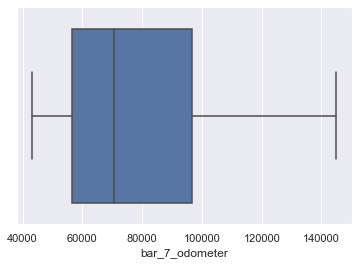

In [55]:
print(len(surveys.loc[(surveys.bar_7_odometer < -3878.75) | (surveys.bar_7_odometer > 157131.25)]))
sns.boxplot(surveys.bar_7_odometer);

In [160]:
bar_7 = surveys.loc[(surveys.bar_7_odometer > -3878.75) & (surveys.bar_7_odometer < 157131.25)]
bar_7.head()

,report_id,vehicle_id,date_submit,model_year,model,country,date_built,date_acquired,qc_port,state,city,postal_code,odometer,unit_distance,capacity_bars,perceived_range,perceived_range_text,soc_meter,gids_80,gids_100,ah_pack,soh,hx,bar_11_date,bar_11_odometer,bar_10_date,bar_10_odometer,bar_9_date,bar_9_odometer,bar_8_date,bar_8_odometer,bar_7_date,bar_7_odometer,batt_swapped,batt_swap_count,batt_swap_warranty,dist_batt_swap,date_batt_swap,bars_batt_swap,gids_batt_swap,ah_batt_swap,soh_batt_swap,charge_method,charge_method_text,range_charge_frequency,range_charge_frequency_text,standard_charge_frequency,standard_charge_frequency_text,topoff_charge_frequency,parked_charge_frequency,...,drive_frequency,trip_distance,elevation_gain,elevation_unit,highway_pct,highway_speed,lbw_count,turtle_count,tow_count,ownership,acquired_condition,ownership_text,date_disposed,battery_check_month,battery_check_year,report_qc,report_topoff,report_efficiency,report_parked,dist_2010,efficiency_2010,kwh_2010,dist_2011,efficiency_2011,kwh_2011,dist_2012,efficiency_2012,kwh_2012,dist_2013,efficiency_2013,kwh_2013,dist_2014,efficiency_2014,kwh_2014,dist_2015,efficiency_2015,kwh_2015,dist_2016,efficiency_2016,kwh_2016,dist_2017,efficiency_2017,kwh_2017,comments,bar_12_age,bar_11_age,bar_10_age,bar_9_age,bar_8_age,bar_7_age
4,1325,626,2021-08-18 19:59:00,2012,LEAF SV,United States,2012-04-01,2019-09-01,t,CA,Los Angeles,90039,55760,mi,12,1,Range has increased ...,f,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,2020-02-25,53000.0,t,1.0,f,"55,260",08/09/2021,7.0,NaN,NaN,NaN,1,Household outlet (110 to 120V),5,Weekly,3,Most days of the week,6,8,...,3,15,50.0,ft,25,60,0,0,0,1,2,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0
10,1284,631,2020-03-03 20:21:00,2011,LEAF SL,United States,2011-03-01,2011-05-01,t,CA,La Crescenta,91214-3424,151258,mi,8,5,Significantly less (over 10 miles) ...,t,NaN,171.0,32.00,65.00,NaN,NaT,85000.0,NaT,98000.0,NaT,120000.0,NaT,135000.0,NaT,145000.0,t,1.0,f,"49,885",04/25/2016,9.0,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),1,More than once per day,3,Most days of the week,6,4,...,2,100,1500.0,ft,95,65,125,2,2,1,1,Own,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011 pack was only charged 6 times a week 5 a...,NaN,NaN,NaN,NaN,NaN,NaN
417,1287,206,2020-03-06 19:44:00,2011,NaN,United States,2011-03-01,2011-05-01,t,CA,Carlsbad,92011,43850,mi,7,5,Significantly less (over 10 miles) ...,f,NaN,NaN,NaN,NaN,NaN,2014-02-06,16500.0,2015-02-12,23000.0,2016-10-09,29900.0,2018-04-06,36764.0,2020-01-11,43200.0,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Level 2 Charging Station (208 to 240V),6,A few times per month,4,A few times per week,12,8,...,4,6,280.0,ft,0,63,10,0,0,1,1,Own,NaN,5.0,2017.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6042.0,6.0,1011.0,4539.0,5.9,771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driving range is less than 50% of new.,NaN,1012.0,1383.0,1988.0,2532.0,3177.0
429,1278,41,2020-03-03 14:19:00,2011,LEAF SL,United States,2011-03-01,2011-05-01,t,CA,LosAngeles,91040,185583,mi,10,5,Significantly less (over 10 miles) ...,t,197.0,224.0,50.01,78.39,59.64,2018-08-31,160500.0,2020-02-15,184400.0,2014-05-28,73205.0,2014-12-09,86500.0,2015-01-20,101200.0,t,1.0,f,"104,237",02/28/2015,7.0,149.0,36.13,52.0,5,120/240V with frequent Quick Charging,4,A few times per week,10,A few times per year,11,12,...,3,35,1200.0,ft,90,55,1000,50,4,1,1,Own,NaN,6.0,2015.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,10978.0,5.6,1958.5,23619.0,6.0,3901.0,23000.0,6.2,3706.0,23941.0,6.3,3781.0,11367.0,6.2,1827.0,NaN,NaN,NaN,NaN,NaN,NaN,Add on Brusa charger controlled by LeafDD for ...,NaN,2679.0,3212.0,1123.0,1318.0,1360.0
586,1191,305,2018-05-01 12:38:00,2011,LEAF SL,United States,2011-03-01,2011-03-01,t,CA,sebastopol,95472,69700,mi,7,5,Significantly less (over 10 miles) ...,NaN,Na

In [161]:
bar_7.to_csv('../data/leaf_bar_7.csv', index = False)

Create bars and mileage DataFrame

In [58]:
bars_miles = pd.DataFrame(columns=['Battery Capacity Bars','Average Mileage'])

In [59]:
bars_miles['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [60]:
bars_miles.loc[5, 'Average Mileage'] = bar_7.bar_7_odometer.mean()

In [61]:
bars_miles.loc[4, 'Average Mileage'] = bar_8.bar_8_odometer.mean()

In [62]:
bars_miles.loc[3, 'Average Mileage'] = bar_9.bar_9_odometer.mean()

In [63]:
bars_miles.loc[2, 'Average Mileage'] = bar_10.bar_10_odometer.mean()

In [64]:
bars_miles.loc[1, 'Average Mileage'] = bar_11['bar_11_odometer'].mean()

In [65]:
bars_miles.loc[0, 'Average Mileage'] = surveys_usa[surveys_usa['capacity_bars'] == 12].odometer.mean()

In [66]:
bars_miles['Average Mileage'] = bars_miles['Average Mileage'].apply(np.floor)
bars_miles

,Battery Capacity Bars,Average Mileage
0,12,17134
1,11,25764
2,10,30539
3,9,43171
4,8,54196
5,7,80771


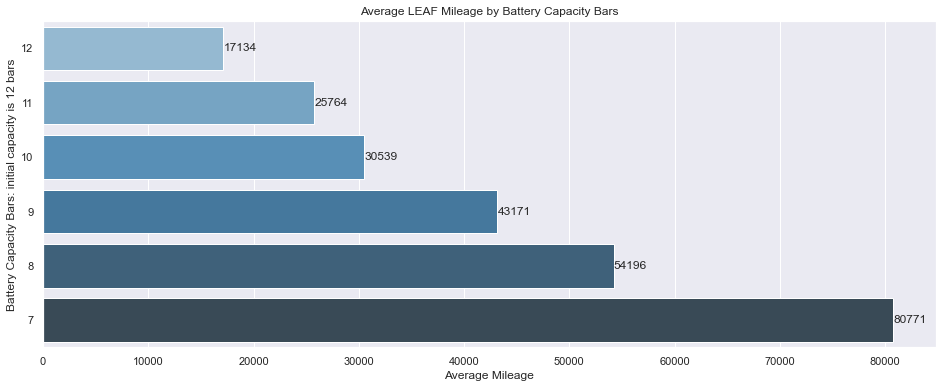

In [67]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Average Mileage',
            y='Battery Capacity Bars',
            data=bars_miles, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
#ax.margins(y=0.1)
plt.xlabel('Average Mileage')
plt.ylabel('Battery Capacity Bars: initial capacity is 12 bars')
plt.title('Average LEAF Mileage by Battery Capacity Bars');

In [68]:
bars_miles.to_csv(index=False)

'Battery Capacity Bars,Average Mileage\r\n12,17134\r\n11,25764\r\n10,30539\r\n9,43171\r\n8,54196\r\n7,80771\r\n'

The capacity bars give a rough idea of the battery pack's capacity. 
The first of the 12 bars is lost when the pack has lost about 15% of its original capacity 
and thereafter bars represent about 7.5%.

### Average Nissan LEAF age by battery capacity bars 
#### Age of a Nissan LEAF for Various Battery Capacity Bars
    Changed column from object to datetime
    Added age column to calculate date from data vehicle was acquired and 1st driven to the reported capacity bar loss level

In [69]:
surveys['date_submit'] = pd.to_datetime(surveys['date_submit'])

In [70]:
bar_12_nosw.date_submit = pd.to_datetime(bar_12_nosw.date_submit)

C:\Users\VDMA Coder\AppData\Local\Temp\ipykernel_20056\2427670767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_12_nosw.date_submit = pd.to_datetime(bar_12_nosw.date_submit)


In [71]:
surveys['date_built'] = pd.to_datetime(surveys['date_built'])

In [72]:
surveys['date_acquired'] = pd.to_datetime(surveys['date_acquired'])

In [73]:
bar_12_nosw['date_acquired'] = pd.to_datetime(bar_12_nosw['date_acquired'])

C:\Users\VDMA Coder\AppData\Local\Temp\ipykernel_20056\3338554532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_12_nosw['date_acquired'] = pd.to_datetime(bar_12_nosw['date_acquired'])


In [74]:
surveys['bar_11_date'] = pd.to_datetime(surveys['bar_11_date'])

In [75]:
surveys['bar_10_date'] = pd.to_datetime(surveys['bar_10_date'])

In [76]:
surveys['bar_9_date'] = pd.to_datetime(surveys['bar_9_date'])

In [77]:
surveys['bar_8_date'] = pd.to_datetime(surveys['bar_8_date'])

In [78]:
surveys['bar_7_date'] = pd.to_datetime(surveys['bar_7_date'])

In [134]:
surveys['bar_12_age'] = (bar_12_nosw['date_submit'] - bar_12_nosw['date_acquired']).dt.days
surveys.bar_12_age.describe()

count     153.000000
mean      683.705882
std       483.512231
min        10.000000
25%       360.000000
50%       607.000000
75%       973.000000
max      3389.000000
Name: bar_12_age, dtype: float64

In [135]:
bar12age = round((surveys.bar_12_age.mean()/ 365.2425), 1)
bar12age

1.9

#### Age of a Nissan LEAF when losing the 1st bar
### Average Years when the capacity drops to 11 Battery Capacity Bars

In [129]:
surveys['bar_11_age'] = (surveys['bar_11_date'] - surveys['date_acquired']).dt.days
surveys.bar_11_age.describe()

count     160.000000
mean      858.175000
std       495.881003
min      -605.000000
25%       531.000000
50%       819.000000
75%      1109.750000
max      2679.000000
Name: bar_11_age, dtype: float64

In [130]:
bar11age = round((surveys.bar_11_age.mean()/ 365.2425), 1)
bar11age

2.3

#### Age of a Nissan LEAF when losing the 2nd bar - Bar 10

In [127]:
surveys['bar_10_age'] = (surveys['bar_10_date'] - surveys['date_acquired']).dt.days
surveys.bar_10_age.describe()

count      67.000000
mean     1129.522388
std       609.837568
min        37.000000
25%       802.500000
50%      1019.000000
75%      1435.000000
max      3212.000000
Name: bar_10_age, dtype: float64

In [128]:
bar10age = round((surveys.bar_10_age.mean()/ 365.2425), 1)
bar10age

3.1

#### Bar_9_age column

In [124]:
surveys['bar_9_age'] = (surveys['bar_9_date'] - surveys['date_acquired']).dt.days
surveys.bar_9_age.describe()

count      36.000000
mean     1393.027778
std       752.704438
min        40.000000
25%       828.250000
50%      1183.500000
75%      1829.750000
max      3104.000000
Name: bar_9_age, dtype: float64

In [125]:
bar9age = round((surveys.bar_9_age.mean()/ 365.2425), 1)
bar9age

3.8

#### Bar_8_age column

In [120]:
surveys['bar_8_age'] = (surveys['bar_8_date'] - surveys['date_acquired']).dt.days
surveys.bar_8_age.describe()

count      23.000000
mean     1802.695652
std       668.526088
min       840.000000
25%      1328.000000
50%      1685.000000
75%      2228.000000
max      3279.000000
Name: bar_8_age, dtype: float64

In [172]:
surveys.bar_8_age

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12     2259.0
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        NaN
46        NaN
47        NaN
48        NaN
49        NaN
50        NaN
51        NaN
52        NaN
53        NaN
54        NaN
55        NaN
56        NaN
57        NaN
58        NaN
59        NaN
60        NaN
61        NaN
62        NaN
63        NaN
64        NaN
65        NaN
66        NaN
67        NaN
68        NaN
69        NaN
70        NaN
71    

In [122]:
bar8age = round((surveys.bar_8_age.mean()/ 365.2425), 1)
bar8age

4.9

#### Bar_7_age column

In [113]:
surveys['bar_7_age'] = (surveys['bar_7_date'] - surveys['date_acquired']).dt.days

In [151]:
surveys.bar_7_age.describe()

count       5.000000
mean     1849.200000
std      1158.863538
min       177.000000
25%      1360.000000
50%      1930.000000
75%      2602.000000
max      3177.000000
Name: bar_7_age, dtype: float64

In [123]:
bar7age = round((surveys.bar_7_age.mean()/ 365.2425), 1)
bar7age

5.1

Battery longevity (Age) DataFrame


In [91]:
bars_age = pd.DataFrame(columns=['Battery Capacity Bars','Age (Years)'])

In [92]:
bars_age['Battery Capacity Bars'] = ['12', '11', '10', '9', '8', '7']

In [136]:
bars_age.loc[5, 'Age (Years)'] = bar7age

In [137]:
bars_age.loc[4, 'Age (Years)'] = bar8age

In [138]:
bars_age.loc[3, 'Age (Years)'] = bar9age

In [139]:
bars_age.loc[2, 'Age (Years)'] = bar10age

In [140]:
bars_age.loc[1, 'Age (Years)'] = bar11age

In [141]:
bars_age.loc[0, 'Age (Years)'] = bar12age

In [142]:
bars_age

,Battery Capacity Bars,Age (Years)
0,12,1.9
1,11,2.3
2,10,3.1
3,9,3.8
4,8,4.9
5,7,5.1


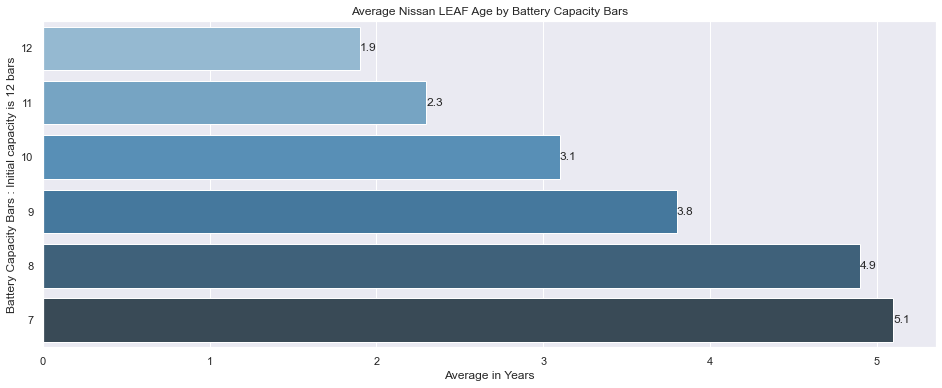

In [143]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Age (Years)',
            y='Battery Capacity Bars',
            data=bars_age, 
            estimator=sum, 
            ci=None, 
            palette="Blues_d"
            )
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Average in Years')
plt.ylabel('Battery Capacity Bars : Initial capacity is 12 bars')
plt.title('Average Nissan LEAF Age by Battery Capacity Bars');

In [144]:
leaf_bars = pd.merge(bars_miles, bars_age ,on = "Battery Capacity Bars", how = "inner")
leaf_bars

,Battery Capacity Bars,Average Mileage,Age (Years)
0,12,17134,1.9
1,11,25764,2.3
2,10,30539,3.1
3,9,43171,3.8
4,8,54196,4.9
5,7,80771,5.1


In [145]:
leaf_bars.to_csv('../data/leaf_bars.csv', index = False)

### Losing Battery Capacity Bars
####  How fast will the battery lose capacity? It largely depends on the age of the car and the mileage driven, among other factors: 
The analysis shows that Nissan LEAF electric vehicles that have lost one bar and are displaying 11 bars report an average age of 2.4 years and have driven 25,764 miles.
Another bar is lost at an average age of 3.1 years and just about 30,000 miles!

Note: this is not the average age/mileage at the moment when the first bar is lost, but the average stats for owners reporting the state of 11 bars. Vehicles would have been a bit younger and been driven fewer miles when the first bar was lost.

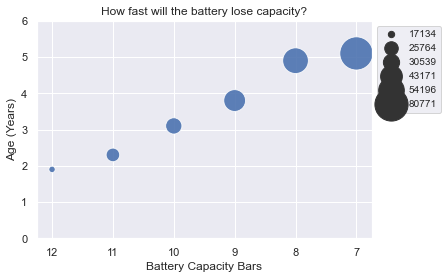

In [163]:
sns.scatterplot(data=leaf_bars, x="Battery Capacity Bars", y="Age (Years)", size="Average Mileage", alpha=0.9, sizes=(40, 1100))
plt.ylim([0,6])
plt.title('How fast will the battery lose capacity?');
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=10);

**Owner of 2001 LEAF in WA comment: 
"RANGE is 35 miles!  Car was taken to selling/service dealer in warrantee, miles 40000  Dealer service dept said no replacement, come back at 8 bars.  “Don’t worry, you have a 100,000 mile warrantee."  Returned at 8 bars. “sorry you are at 61 months, no warrantee”**

### Nissan LEAF Capacity Loss Warranty:
#### The Lithium-Ion battery is also warranted against capacity loss below nine bars of capacity as shown on the vehicle’s battery capacity level gauge for a period of 60 months or 60,000 miles, whichever comes first.


**Important to note: Standard Battery Warranty vs Capacity Loss Warranty**

Battery warranty only covers defects/ malfunction and not capacity loss and most automakers don't offer this

### What Does Battery Degradation Mean for You?

Full original capacity starts at 12 bars and then an approximate 15% loss for the first bar that is lost. 
Thereafter bars represent about 7.5% degradation of the battery pack's original capacity.  

The Nissan LEAF EV originally had a **24 kWh battery pack**, but Nissan has upgraded the LEAF’s battery three times since 2011. 
In 2016, Nissan offered an optional **30 kWh battery** for the LEAF, increasing its driving range from 80 miles to 107 miles of range. Then, in 2018 a **40 kWh lithium-ion battery** was introduced, which has an EPA range rating of 149 miles of range. 
Most recently, in 2019, Nissan added the LEAF e-Plus to the lineup, which has a **62 kWh battery** and 226 miles of range. 
The base LEAF with the 40 kWh battery pack is still available.


In [104]:
data = {'Battery Capacity Bars': [12,11,10,9,8,7],
       'Percent Degradation': [0,15.0,22.5,30.0,37.5,45.0],
       '24kWh Battery Range': [80,68,62,56,50,44],
       '30kWh Battery Range': [107,91,83,75,67,59],
       '40kWh Battery Range': [149,127,115,104,93,82],
       '62kWh Battery Range': [226,192,175,158,141,124]}
leaf_range = pd.DataFrame(data, columns = ['Battery Capacity Bars','Percent Degradation','24kWh Battery Range','30kWh Battery Range','40kWh Battery Range','62kWh Battery Range'])

In [105]:
leaf_range

,Battery Capacity Bars,Percent Degradation,24kWh Battery Range,30kWh Battery Range,40kWh Battery Range,62kWh Battery Range
0,12,0.0,80,107,149,226
1,11,15.0,68,91,127,192
2,10,22.5,62,83,115,175
3,9,30.0,56,75,104,158
4,8,37.5,50,67,93,141
5,7,45.0,44,59,82,124


In [162]:
leaf_range.to_csv('../data/leaf_range.csv', index = False)

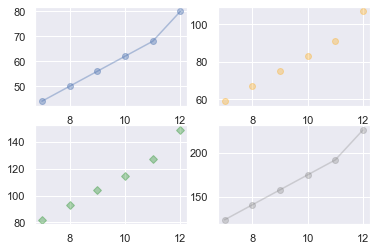

In [106]:
plt.subplot(221)
plt.plot( 'Battery Capacity Bars', '24kWh Battery Range', data=leaf_range, marker='o', alpha=0.4)
plt.subplot(222)
plt.plot( 'Battery Capacity Bars','30kWh Battery Range', data=leaf_range, linestyle='none', marker='o', color="orange", alpha=0.3)
plt.subplot(223)
plt.plot( 'Battery Capacity Bars','40kWh Battery Range', data=leaf_range, linestyle='none', marker='D', color="green", alpha=0.3)
plt.subplot(224)
plt.plot( 'Battery Capacity Bars','62kWh Battery Range', data=leaf_range, marker='o', color="grey", alpha=0.3);

Attempt at a sectioned pie chart with separate slices

NameError: name 'OFFSET' is not defined

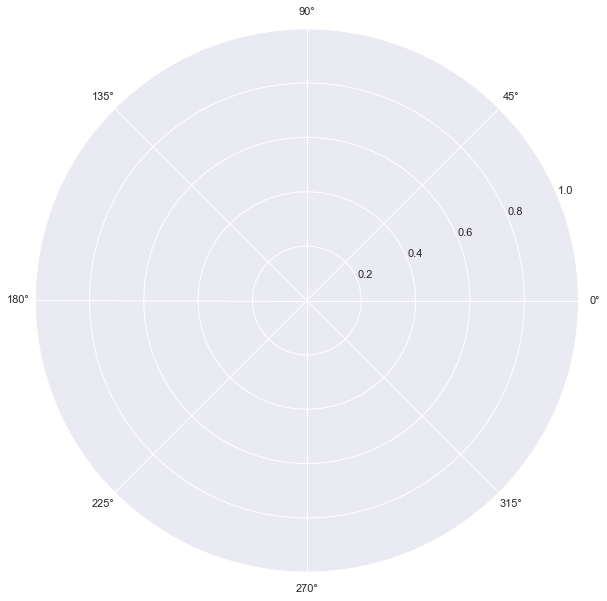

In [107]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        )

VALUES = leaf_range["24kWh Battery Range"].values
LABELS = leaf_range["Percent Degradation"].values
GROUP = leaf_range["Battery Capacity Bars"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [12,11,10,9,8,7]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [12,11,10,9,8,7]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD